In [1]:
import numpy as np
import scipy as sp
import scipy.signal as sps
import matplotlib.pyplot as plt

In [2]:
def KonstruirajGausssian(space, mu, s):
    return 1/(s*np.sqrt(2*np.pi)) * np.exp(-0.5 * (space - mu)**2/(s)**2) 

def NajmanjiKvadrati(x):
    pok = sps.convolve(x,kernel)
    return np.mean(np.square(x - konv))

def Tikhonov (x):
    l = 10**-1
    return NajmanjiKvadrati(x) + l*np.mean(np.square(x))

In [3]:
n = 50
n_kernel = 10
space = np.linspace(0,1,n+1)
kernel_space = np.linspace(0,1,n)


In [4]:
#dioKernela = KonstruirajGausssian(kernel_space,0,0.1)#np.array([4,2,1,1])
#kernel = np.zeros(n+1)
#kernel[0:len(dioKernela)] = dioKernela
#kernel = KonstruirajGausssian(kernel_space,0.5,0.1)
#kernel = kernel/np.sum(kernel)
kernel = np.loadtxt('Primjeri/kernel1.txt')

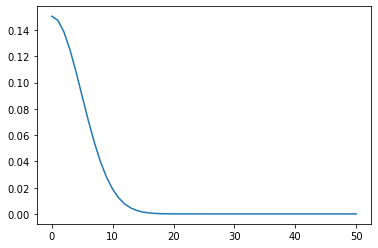

51


In [5]:
plt.plot(kernel)
plt.show()
print(len(kernel))

In [6]:
signal = 2* KonstruirajGausssian(space, 0.2, 0.2) + KonstruirajGausssian(space, 0.7, 0.1)
#signal = np.loadtxt('Primjeri/signal2')
#signal[24] = signal[24] + 2

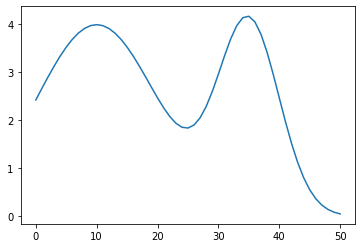

In [7]:
plt.plot(signal)
plt.show()

In [8]:
noise = np.random.randn(n+1)*0.1
tmp = sp.linalg.toeplitz(kernel)

konv = np.dot(tmp,signal) + noise

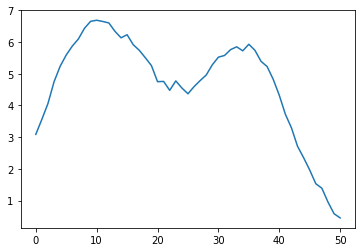

In [9]:
plt.plot(konv)
plt.show()

In [10]:
rje = np.dot(np.linalg.inv(tmp),konv)

In [11]:
n_cos = 51
V = np.zeros([n+1,n_cos])
for i in range(0,n_cos):
    for j in range(0,n+1):
        V[j,i] = np.cos((2*j + 1) * i * np.pi/(2*(n+1)))


In [12]:
mat = np.dot(tmp,V)
rjeCos = np.dot(np.linalg.pinv(mat),konv)

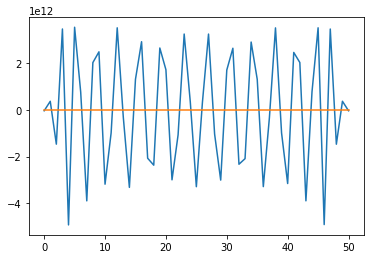

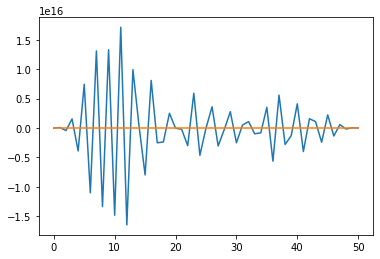

In [13]:
plt.plot(np.dot(V,rjeCos))
plt.plot(signal)
plt.show()
plt.plot(rje)
plt.plot(signal)
plt.show()

In [15]:
for i in range (0,n_cos):
    print(np.dot(V[:,0],V[:,i]))

51.0
6.661338147750939e-16
2.220446049250313e-16
1.9984014443252818e-15
1.3322676295501878e-15
2.3869795029440866e-15
2.6645352591003757e-15
8.715250743307479e-15
-1.9984014443252818e-15
-8.382183835919932e-15
5.329070518200751e-15
6.8833827526759706e-15
-4.440892098500626e-15
1.3378187446733136e-14
-1.2878587085651816e-14
-8.604228440844963e-15
8.881784197001252e-16
9.004248876915987e-15
1.532107773982716e-14
-1.0907941216942163e-14
8.881784197001252e-16
2.1094237467877974e-15
-1.3322676295501878e-14
-1.7319479184152442e-14
-3.552713678800501e-15
5.329070518200751e-15
-1.7763568394002505e-15
-1.687538997430238e-14
-1.6209256159527285e-14
1.7319479184152442e-14
1.0769163338864018e-14
1.5987211554602254e-14
6.328271240363392e-15
-1.3322676295501878e-15
-4.5574655160862676e-14
3.1086244689504383e-15
-5.162537064506978e-15
1.2212453270876722e-14
-2.4313884239290928e-14
1.0436096431476471e-14
-3.441691376337985e-14
1.7541523789077473e-14
-2.0317081350640365e-14
-1.0824674490095276e-14
-8.7

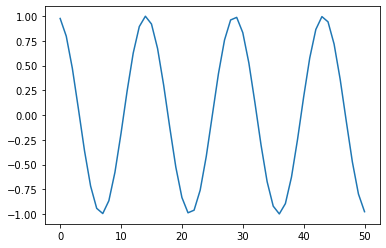

In [16]:
plt.plot(V[:,7])
plt.show()

1


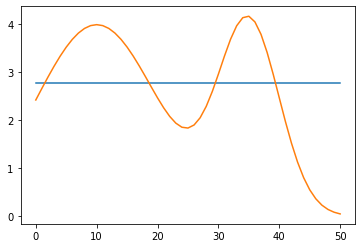

2


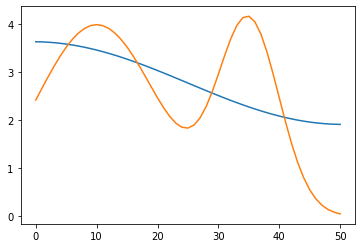

3


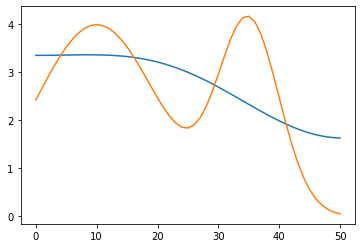

4


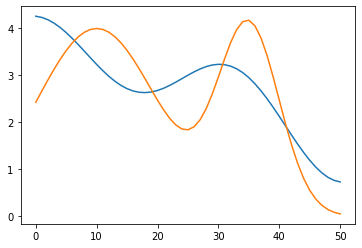

5


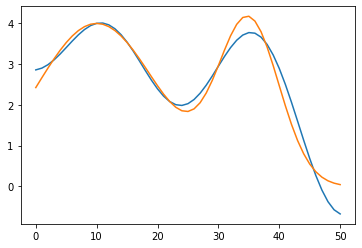

6


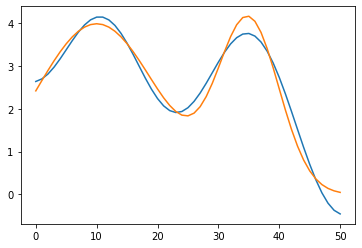

7


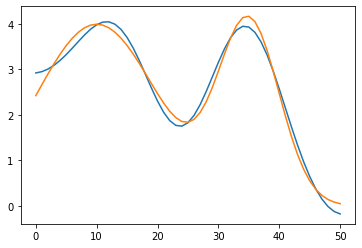

8


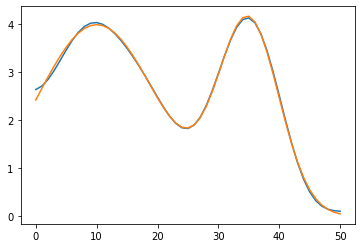

9


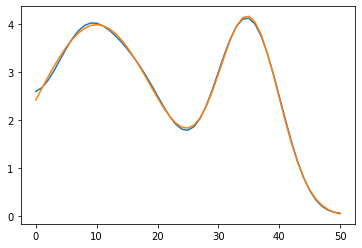

10


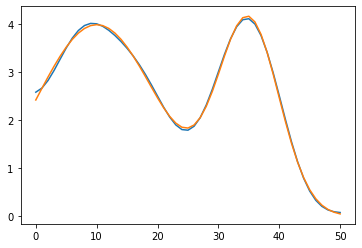

11


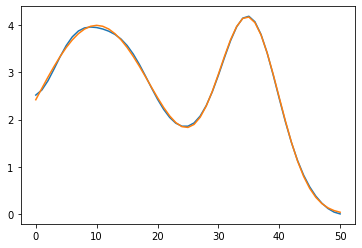

12


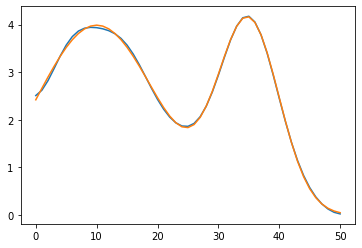

13


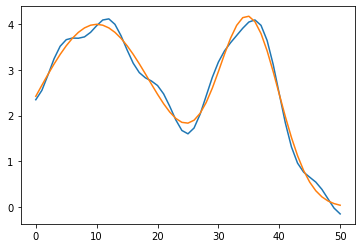

14


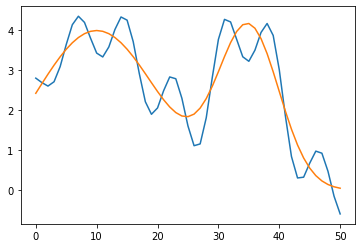

15


16


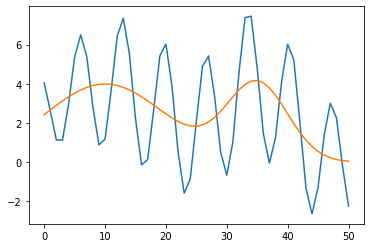

17


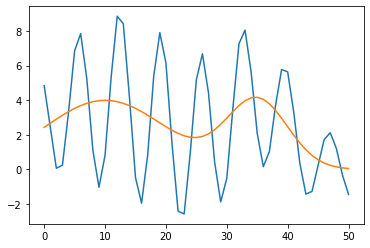

18


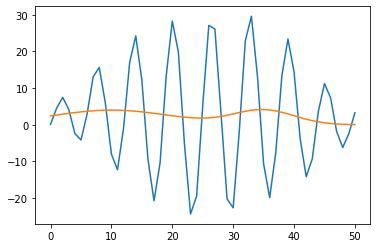

19


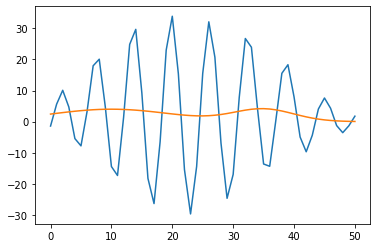

20


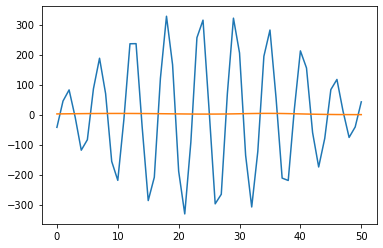

21


22


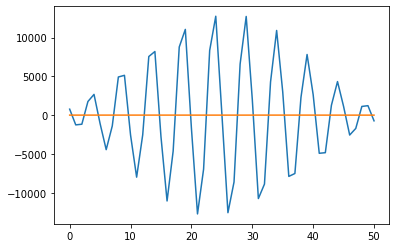

23


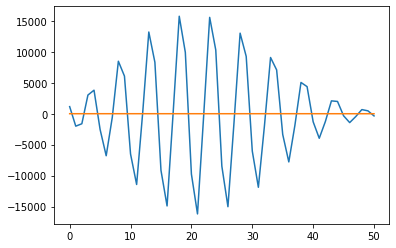

24


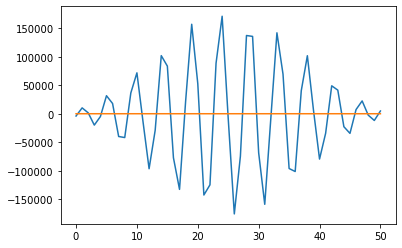

25


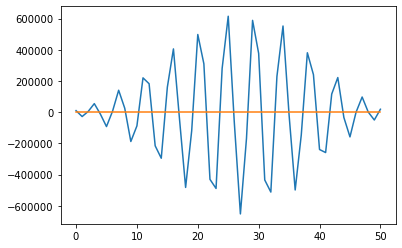

26


27


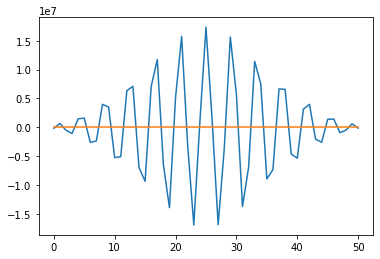

28


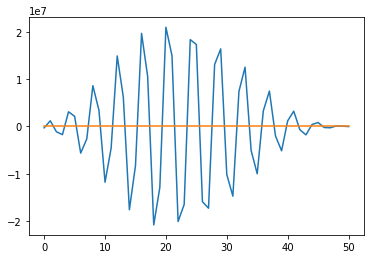

29


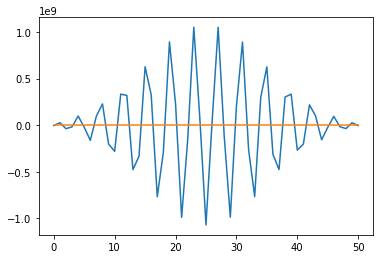

30


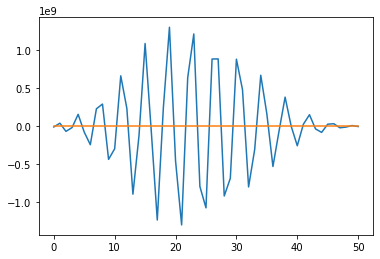

31


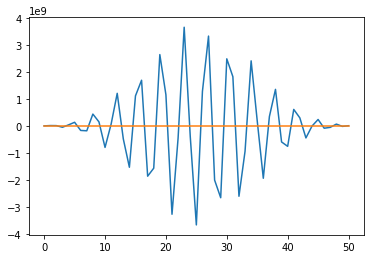

32


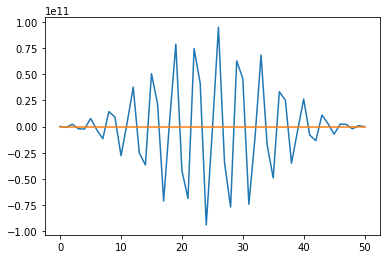

33


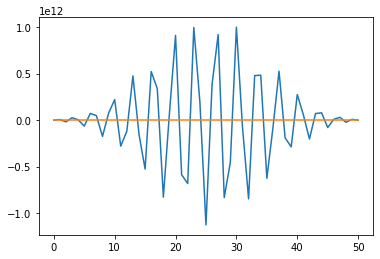

34


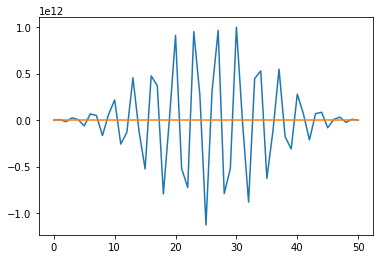

35


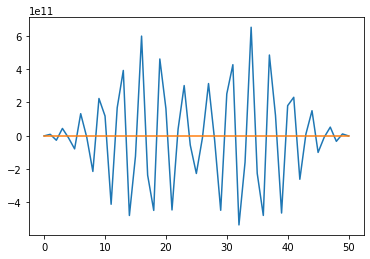

36


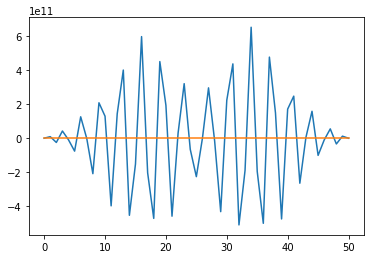

37


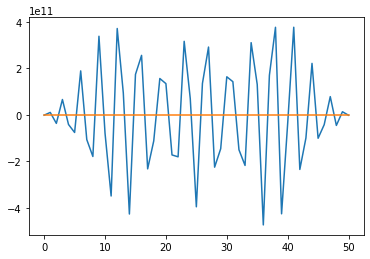

38


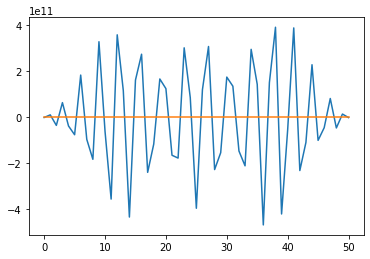

39


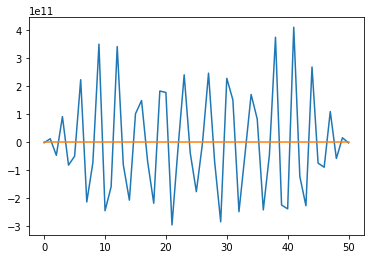

40


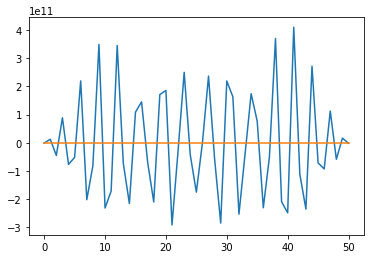

41


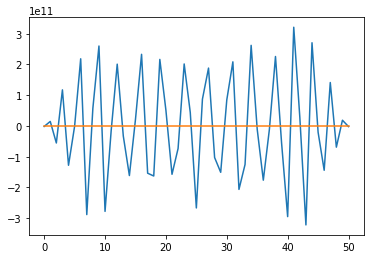

42


43


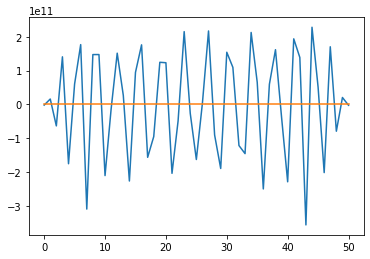

44


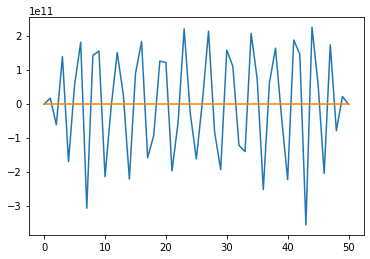

45


46


47


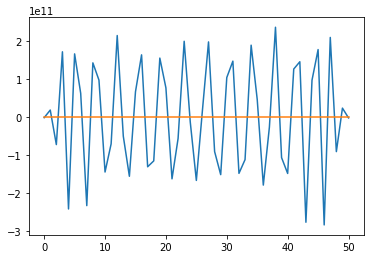

48


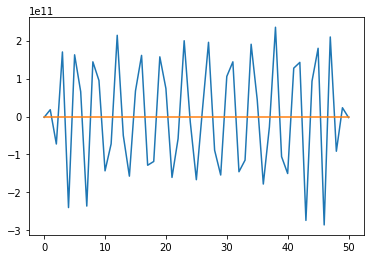

49


50


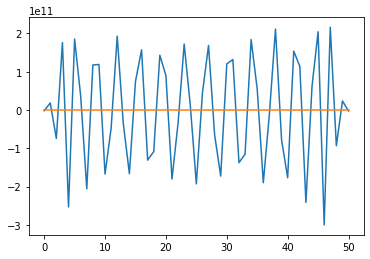

In [17]:
for i in range(1,n_cos):
    print(i)
    mat = np.dot(tmp,V[:,0:i])
    rjeCos = np.dot(np.linalg.pinv(mat),konv)
    plt.plot(np.dot(V[:,0:i],rjeCos))
    plt.plot(signal)
    plt.show()
    

In [ ]:
for i in range(1,n_cos):
    plt.plot(V[:,i])
    plt.show()

In [ ]:
plt.imshow(V)
plt.show()

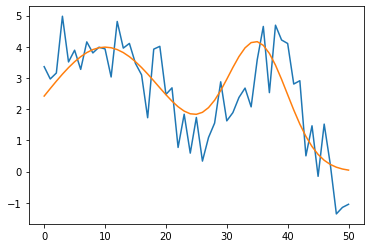

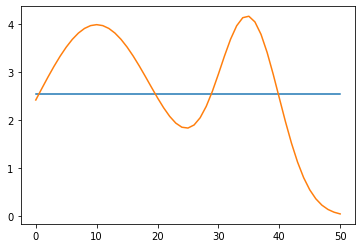

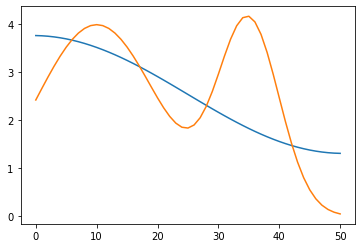

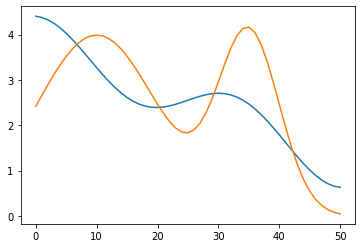

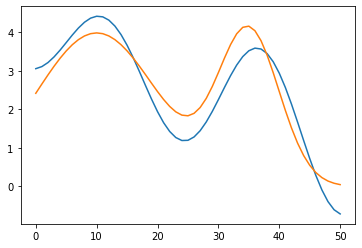

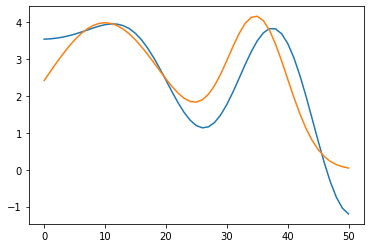

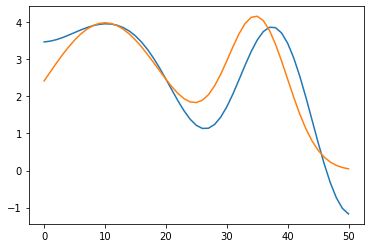

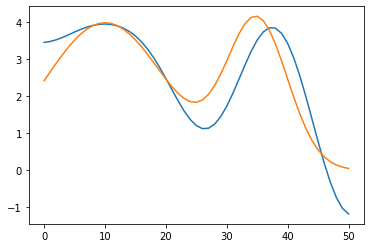

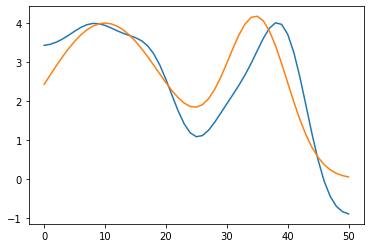

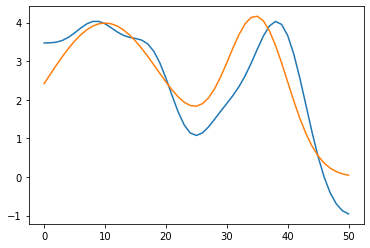

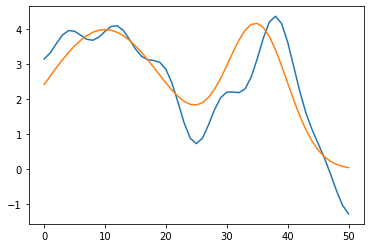

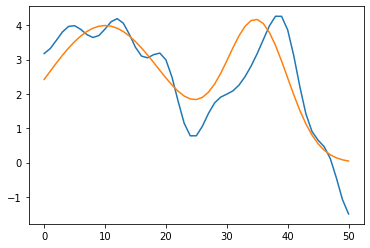

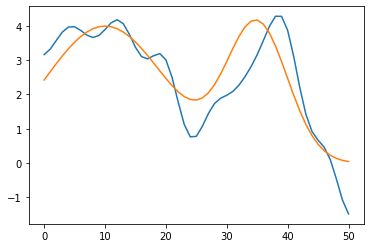

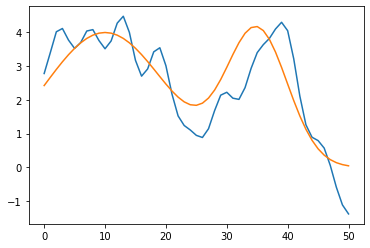

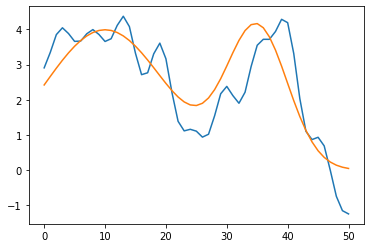

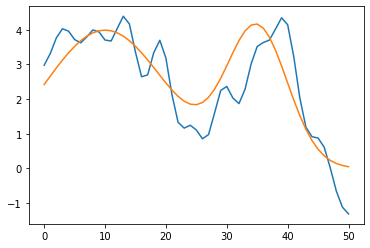

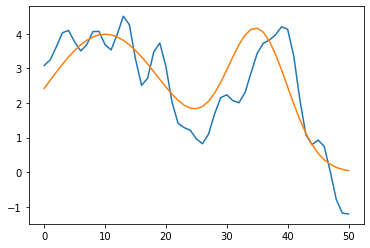

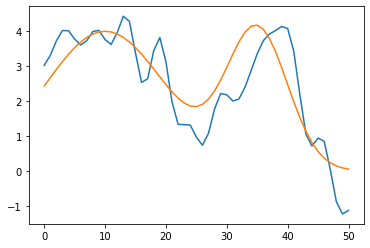

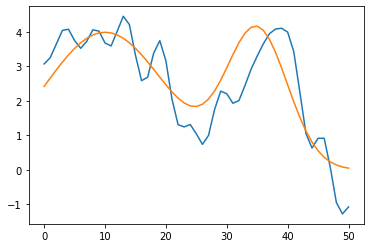

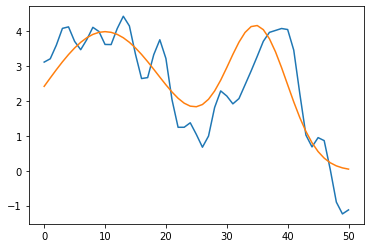

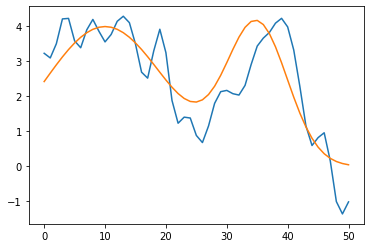

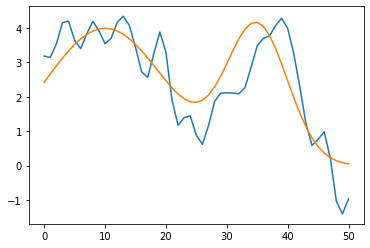

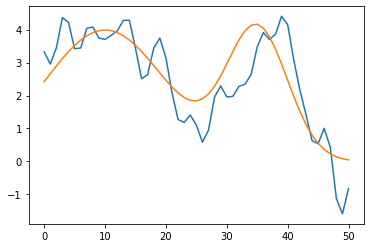

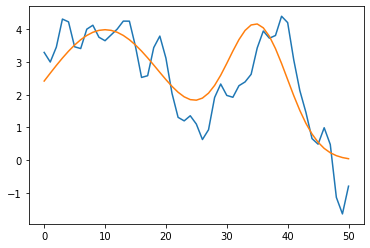

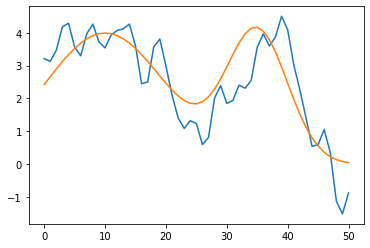

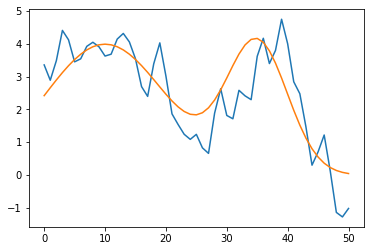

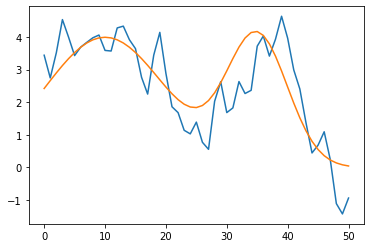

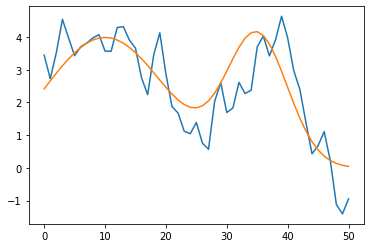

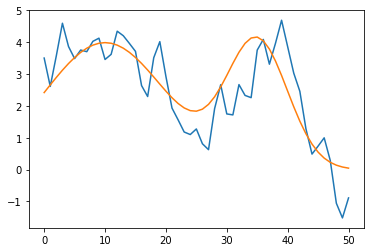

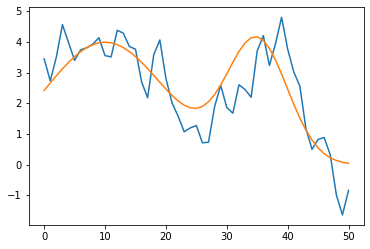

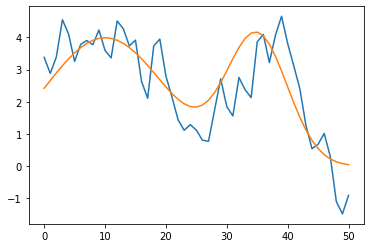

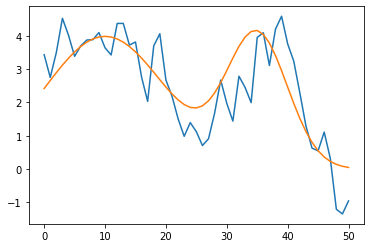

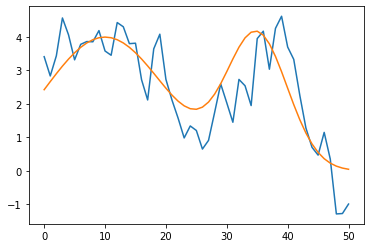

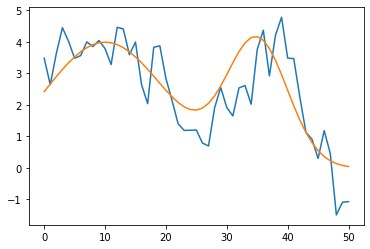

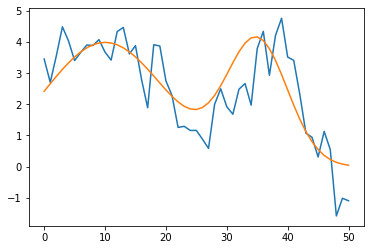

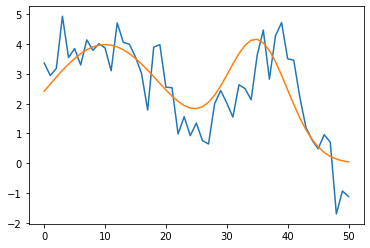

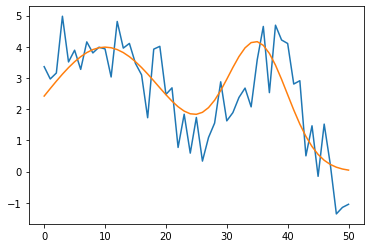

In [19]:
n_rec = 51
noisy_signal = signal + np.random.randn(n+1)

plt.plot(noisy_signal)
plt.plot(signal)
plt.show()

rec = np.zeros(n+1)
for i in range (0,n_rec):
    rec = rec + np.dot(noisy_signal,V[:,i])*V[:,i]/np.linalg.norm(V[:,i])**2
    plt.plot(rec)
    plt.plot(signal)
    plt.show()

In [ ]:
np.savetxt('Primjeri/noisy_signal2', noisy_signal)